# HW2 Multinomial Bayes Classfier

#### Name: Haochen (Harry) Wang

In [1]:
from run import *
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harrywanghc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Q.1 (18 Points) 

##### You will first run an experiment to evaluate how the performance of the Naive Bayes algorithm is affected depending on whether (i) you classify instances by computing the pos- terior probability, Pr(yi | Doc), according to the standard equation (Eq. (1)); or (ii) you classify instances by performing the log-transformation trick discussed in class and compare log-probabilities, log(Pr(yi | Doc)), instead of probabilities. Recall, in particular, that estimating the posterior probability using Eq. (1) might cause numerical issues/instability since it requires computing the product of (possibly) hundreds of small terms—which makes this probability estimate rapidly approach zero. To tackle this problem, we often compare not Pr(y1 | Doc) and Pr(y2 | Doc), but the corresponding log-probabilities: log(Pr(y1 | Doc)) and log(Pr(y2 | Doc)). Taking the logarithm of such probabilities transforms the product of hundreds of terms into the sum of hundreds of terms—which avoids numerical issues. Importantly, it does not change which class is more likely according to the trained model. When classifying a new instance, the log-probabilities that should be compared, for each class yi, are as follows:
$$ log(Pr(y_i|doc)) = log\left( Pr(y_i) \prod_{k=1}^{len(Doc)} Pr(w_k|y_i)\right) $$
$$ log(Pr(y_i|doc)) = log\left( Pr(y_i) +  \sum_{k=1}^{len(Doc)} Pr(w_k|y_i)\right) $$
##### In this experiment, you should use 20% of the training set and 20% of the test set; i.e., call the dataset-loading functions by passing 0.2 as their parameters. First, perform the classification of the instances in the test set by comparing posterior probabilities, Pr(yi | Doc), according to Eq. (1), for both classes. Then, report (i) the accuracy of your model; (ii) its precision; (iii) its recall; and (iv) the confusion matrix resulting from this experiment. Now repeat the same experiment above but classify the instances in the test set by comparing log-probabilities, log(Pr(yi | Doc)), according to Eq. (5), for both classes. Report the same quantities as before. Discuss whether classifying instances by computing log-probabilities, instead of probabilities, affects the model’s performance. Assuming that this transformation does have an impact on performance, does it affect more strongly the model’s accuracy, precision, or recall? Why do you think that is the case?

#### Q1 Answer:

In [2]:
# Find the value using equation (1), with no log and no laplace smoothing
tpq1_1, tnq1_1, fpq1_1, fnq1_1 = naive_bayes(0.2,0.2,0.2,0.2,laplacesmooth=False,logbool=False)

Loading Data, at time 0.00 sec
Learning Training Data, at time  4.82 sec
Testing Positive, at time  6.93 sec
Testing Negative, at time  7.34 sec
Total Time Cost is  7.72 sec
Accuarcy  is:  0.370622
Precision is:  0.362732
Recall    is:  0.334263
F-Score   is:  0.347916


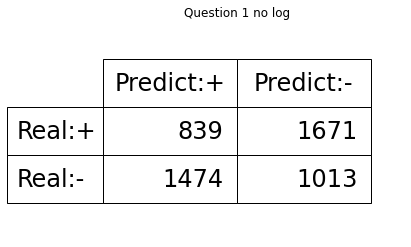

In [3]:
# Now use q1_1 to implement confusion matrix
confusionmatrix(tpq1_1, tnq1_1, fpq1_1, fnq1_1,"Question 1 no log")

Accuarcy  is:  0.387914  
Precision  is:  0.384452  
Recall       is:  0.348613   

Here is the one of the Accuarcy, Precision, Recall and Matrix I have for using equation (1) without using log for the Probability. The value might differ when I export and run the code again.

In [4]:
# Repeat the experiment, find the value using equation (5), with no log and no laplace smoothing
tpq1_2, tnq1_2, fpq1_2, fnq1_2 = naive_bayes(0.2,0.2,0.2,0.2,laplacesmooth=False,logbool=True)

Loading Data, at time 0.00 sec
Learning Training Data, at time  4.76 sec
Testing Positive, at time  7.09 sec
Testing Negative, at time  7.49 sec
Total Time Cost is  7.88 sec
Accuarcy  is:  0.572148
Precision is:  0.583810
Recall    is:  0.495354
F-Score   is:  0.535956


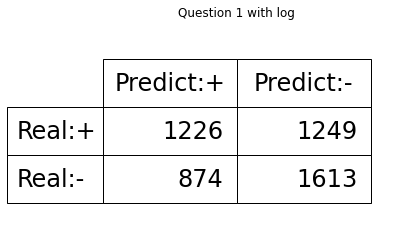

In [5]:
# Confusion Matrix
confusionmatrix(tpq1_2, tnq1_2, fpq1_2, fnq1_2, "Question 1 with log")

Accuarcy  is:  0.573660  
Precision  is:  0.592018  
Recall        is:  0.519253  


Here is the accuarcy, precision, recall and the confusion matrix after implementing log for probability using equation (5). The data might differ since I will run the code again when exporting.

The computaion of summing log-probabilities instead of the 'prod_probabilities' increase the accuracy, precision, and recall of the algorithm. 

Taking accuracy as an example, before using the log-probibiliies, the accuracy was about 0.38. After using lofg for prob, we have accuracy about 0.59, which is a huge improvment: we now correctly classify more than have of the comments (finally better than random!). And for precision and recall, there are also high improvement: from 0.38 to 0.59; from 0.34 to 0.52. 

I think the reason for this is that in equation (1), we are taking the product of a list of probabilities that are small, for instance, (6.4e-18, 2.3e-28, 1.8e-24, ...) and the length of one comment would generally be more than 100 words (count repeated as one) appeared, so the product would easily exceed the smallest float in python, which is 2.2251e-308. Hence the classifier is inaccurate since there are many zeros. (Also I set the classifier to > and < instead of <= and >=. If the no-log-prob classifier was with <= and >=, the accuracy was about 0.70). After using the log-probilities, we change the product to the sum of log-probilities, and that follows:

$$a = b$$
$$log(a) = (b) $$

So, for probability,

$$ Prob(a) < Prob(b) $$
$$ log(Prob(a)) < log(Prob(b)) $$

And since

$$ log(a*b) = log(a)+log(b) $$

So we solve the problem of exceeding 2.2251e-308 in equation (1). Hence the equation (5) have a better performance.

### Q.2 (18 Points) 
##### An issue with the original Naive Bayes formulation is that if a test instance contains a word that is not present in the vocabulary identified during training, then Pr(word|label) = 0. To mitigate this issue, one solution is to employ Laplace Smoothing. To do so, as discussed in class, we replace the standard way of estimating the probability of a word wk, given a class yi, with the following equation:
$$ Pr(w_k|y_i) = \frac{n(w_k,y_i)+1}{\sum_{s=1}^{|V|} n(w_s,y_i)+|V|} $$
##### More generally, Laplace Smoothing can be performed according to a parametric equation, where instead of adding 1 to the numerator, we adjust the probability of a word belong to a class by adding a user-defined parameter α to the numerator, as follows:
$$ Pr(w_k|y_i) = \frac{n(w_k,y_i)+\alpha}{\sum_{s=1}^{|V|} n(w_s,y_i)+\alpha|V|} $$
##### Intuitively, setting α = 0 results in the standard formulation of Naive Bayes—which does not tackle the problem of words that do not appear in the training set. Suppose, alternatively, that we set α = 4. This is equivalent to adding 4 “fake” occurrences of that word to the training set, in order to avoid the zero-frequency problem. Using α = 1000, on the other hand, is equivalent to pretending we have seen that word 1000 times in the training set—even though we may have seen it, say, only 8 times. Although this solves the problem of zero-frequency words, it also strongly biases the model to “believe” that that word appears much more frequently than it actually does; and this could make the predictions made by the system less accurate. For these reasons, although it is important/necessary to perform Laplace Smoothing, we have to carefully pick the value of α that works best for our dataset. Using α = 1 is common, but other values might result in better performance, depending on the dataset being analyzed.
##### In this experiment, you should use 20% of the training set and 20% of the test set; i.e., call the dataset-loading functions by passing 0.2 as their parameters. You should first report the confusion matrix, precision, recall, and accuracy of your classifier (when evaluated on the test set) when using α = 1. Now, vary the value of α from 0.0001 to 1000, by multiplying α with 10 each time. That is, try values of α equal to 0.0001, 0.001, 0.01, 0.1, 1.0, 100, and 1000. For each value, record the accuracy of the resulting model when evaluated on the test set. Then, create a plot of the model’s accuracy on the test set (shown on the y-axis) as a function of the value of α (shown on the x-axis). The x-axis should represent α values and use a log scale. Analyze this graph and discuss why do you think the accuracy suffers when α is too high or too low.


#### Q2 Answer:

In [6]:
tpq2, tnq2, fpq2, fnq2 = naive_bayes(0.2,0.2,0.2,0.2,laplacesmooth=True,logbool=True,smoothconst=1)

Loading Data, at time 0.00 sec
Learning Training Data, at time  4.62 sec
Testing Positive, at time  6.89 sec
Testing Negative, at time  7.32 sec
Total Time Cost is  7.75 sec
Accuarcy  is:  0.817056
Precision is:  0.856054
Recall    is:  0.766975
F-Score   is:  0.809070


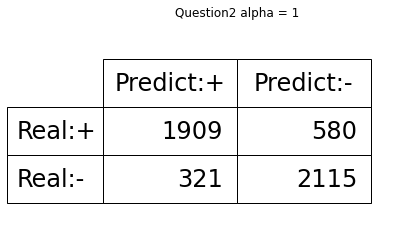

In [7]:
confusionmatrix(tpq2, tnq2, fpq2, fnq2,"Question2 alpha = 1")

Accuarcy  is:  0.812151  
Precision  is:  0.868593  
Recall        is:  0.738218  

We can see with laplace transform with $\alpha = 1$ , the accuracy, precision and recall all improved with the one without using laplace smoothing: I think that's due to the count in of data in instance/comment with words that's not in the positive/negative 'database' or 'dictionary'. 

Without Laplace smoothing, when we see a word that never appear in positive dictionary, we just ignore the word, which is incorrect: ignoring the word make the probability of that word 1 (the prob doesn't change after this word); however, what really should happen is we would have a probability count in, and the probability should be close to zero. So laplace smoothing solve the problem of word not in dictionary.

In [19]:
# Now have fixed data for q2

positrainq2, negatrainq2, vocabq2 = load_training_set(0.2,0.2)
positestq2, negatestq2 = load_test_set(0.2,0.2)

In [20]:
alpha = 0.0001
alphalist = []
accuracylist = []
while alpha <= 1000:
    tpq2_2, tnq2_2, fpq2_2, fnq2_2 = fixdatabayes(positrainq2, negatrainq2, positestq2, negatestq2, vocabq2, True, True, smoothconst=alpha)
    accuracylist.append(accuracy(tpq2_2, tnq2_2, fpq2_2, fnq2_2))
    alphalist.append(alpha)
    alpha*=10
    #print(alpha)

<function matplotlib.pyplot.show(close=None, block=None)>

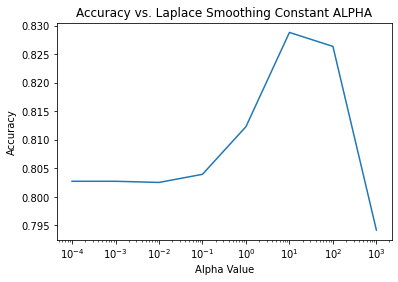

In [21]:
plt.xscale("log")
plt.xlabel("Alpha Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Laplace Smoothing Constant ALPHA")
plt.plot(alphalist,accuracylist)
plt.show

From the graph, we can find out that it follows the shape of a rollercoaster: is a peak around $\alpha = 10^1 $ to $10^2$ and the accuracy is low around very small and very big $\alpha $ value. 

I think that's because when the $\alpha $ is too small, the laplace transform's affect would be countless. And when $\alpha $ is too big, the normal probility's contribution would be decreased. Consider two extreme condition:

 $$lim_{\alpha \to 0}\frac{n+\alpha}{N_{sum}+\alpha |V|} = \frac{n}{N_{sum}}$$ 

$$lim_{\alpha \to \infty}\frac{n+\alpha}{N_{sum}+\alpha |V|} = \frac{1}{|V|}$$ 

where $n $ is $n(w_k,y_i)$ and $N_{sum} $ is $\sum_{s=1}^{|V|}n(w_s,y_i)$ 

What we have in the $\alpha $ as 1000 and 0.0001 fit in two of those condition above: too big and too small.

### Q.3 (18 Points) 
##### Now you will investigate the impact of the training set size on the performance of the model. The classification of new instances, here, should be done by comparing the posterior log-probabilities, log(Pr(yi | Doc)), according to Eq. (5), for both classes. You should use the value of α that resulted in the highest accuracy according to your experiments in the previous question. In this question, you should use 100% of the training set and 100% of the test set; i.e., call the dataset-loading functions by passing 1.0 as their parameters. Then, report (i) the accuracy of your model; (ii) its precision; (iii) its recall; and (iv) the confusion matrix resulting from this experiment.


#### Q3 Answer:

In [11]:
tpq3, tnq3, fpq3, fnq3 = naive_bayes(1,1,1,1,laplacesmooth=True,logbool=True,smoothconst=10)

Loading Data, at time 0.00 sec
Learning Training Data, at time  40.89 sec
Testing Positive, at time  119.61 sec
Testing Negative, at time  129.43 sec
Total Time Cost is  138.25 sec
Accuarcy  is:  0.839720
Precision is:  0.870194
Recall    is:  0.798560
F-Score   is:  0.832840


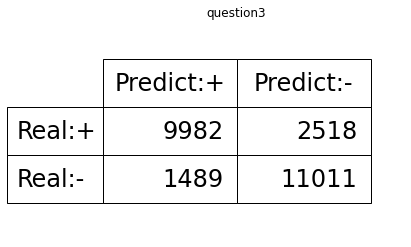

In [12]:
confusionmatrix(tpq3, tnq3, fpq3, fnq3,'question3')

Accuarcy  is:  0.839720  
Precision  is:  0.870194  
Recall        is:  0.798560  
F-Score     is:  0.832840  

The data might change when I run everything again when export the document.

### Q.4 (18 Points) 
##### Now repeat the experiment above but use only 50% of the training instances; that is, load the training set by calling load training set(0.5, 0.5). The entire test set should be used. Report the same quantities as in the previous question. Discuss whether using such a smaller training set had any impact on the performance your learned model. Analyze the confusion matrices (of this question and the previous one) and discuss whether one particular class was more affected by changing the size of the training set.

#### Q4 Answer:

In [13]:
tpq4, tnq4, fpq4, fnq4 = naive_bayes(0.5,0.5,1,1,laplacesmooth=True,logbool=True,smoothconst=10)

Loading Data, at time 0.00 sec
Learning Training Data, at time  17.64 sec
Testing Positive, at time  35.01 sec
Testing Negative, at time  39.46 sec
Total Time Cost is  43.88 sec
Accuarcy  is:  0.838400
Precision is:  0.870403
Recall    is:  0.795200
F-Score   is:  0.831104


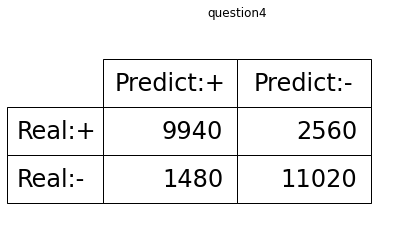

In [14]:
confusionmatrix(tpq4, tnq4, fpq4, fnq4,'question4')

For Question 4, 


Accuarcy  is:  0.832160  
Precision  is:  0.875611  
Recall        is:  0.774320  re

as we can compare to question 3, 


Accuarcy  is:  0.839720  
Precision  is:  0.870194  
Recall        is:  0.798560  


We can find out that the A,P,R (Accuarcy, Precision, Recall) for 1.0 testing data and 0.5 testing data is actually very close, except for the recall: 

the recall of question 4 drop from 0.799 to 9.774. Which is due to the increase in falseNegative.

But overall, as we can see, there isn't a greate change in the result. I think that would be due to the information gain ratio to the increase in training set. Think about len(vocab) as kind of info gain, the graph of 

$$[len-vocab-gain]\  vs. \  [trainingset-loaded]$$

what we should have would be a log graph, when we load training set from from 0.0001 to 0.001, we would have a really rapid len(vocab) gain, and as the training-set-portion getting larger, the increase in the len(vocab) decreases. Hence a 0.5 training & a 1.0 training wouldn't have a big difference compare to 0.01 training & a 0.3 training. 

As shown in the graph below. 


In [15]:
# Code reference
trainportion = 0.0001
portionlist =[]
voclist = []
while trainportion<=0.7:
    voc = load_training_set(trainportion,trainportion)[2]
    voclist.append(len(voc))
    portionlist.append(trainportion)
    trainportion*=1.5

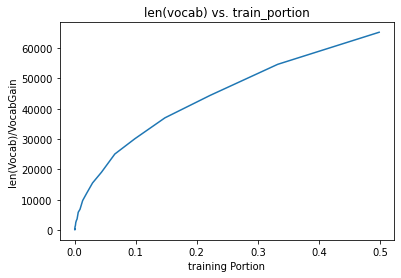

In [16]:
plt.xlabel("training Portion")
plt.ylabel("len(Vocab)/VocabGain")
plt.title("len(vocab) vs. train_portion")
plt.plot(portionlist,voclist)
plt.show()

### Q.5 (10 Points) 
##### In this application (i.e., accurately classifying movie reviews), would you say that it is more important to have high accuracy, high precision, or high recall? Justify your opinion.

#### Q5 Answer:

To be honest, I think for the application of classifying movie reviews, it doesn't matter a lot with the accuracy, since it's unlike classifying tumor, covid or other more significant issues. 

But try to consider three:  
High Accuracy: Find out how's the classification overall  
High Precision: Find out the how many percent of predict+ is real+   
High Recall: Find out the how many percent of real+ is predicted as +  

Since I suppose one of the application of the imdb comment is to find out whether like the movie or not, so they can further recommend other movie to users. So if we know a certain user A is positive about movie X, we can still recommend type X or other Movie, but for certain user that's negative about movie X, we don't want to give him type X movie.

So what's important here is to don't let true negative see movie X again. So we'd like a 'higher recall if consider negative_comment as positive', hence that would be higher precision in normal 'degree of freedom'.

Or we can suppose the application as show positive review in the front (The director pay us 1 million dollar), we don't want to show the falsePositive review/comment in the front. So here, also a higher precision would be better.

### Q.6 (18 Points) 
##### Finally, you will study how the performance of the learned model is affected by training it using an unbalanced dataset (i.e., a dataset with significantly more examples of one of the classes). The classification of new instances, here, should be done by comparing the posterior log-probabilities, log(Pr(yi | Doc)), according to Eq. (5), for both classes. You should use the value of α that resulted in the highest accuracy according to your experiments in the previous questions. You will now conduct an experiment where you use only 10% of the available positive training instances and that uses 50% of the available negative training instances. That is, use load training set(0.1, 0.5). The entire test set should be used. Show the confusion matrix of your trained model, as well as its accuracy, precision, and recall. Compare this model’s performance to the performance (according to these same metrics) of the model trained in question Q.4—that is, a model that was trained under a balanced dataset. Discuss how training under an unbalanced dataset affected each of these performance metrics.

#### Q6 Answer:

In [17]:
tpq6, tnq6, fpq6, fnq6 = naive_bayes(0.1,0.5,1,1,laplacesmooth=True,logbool=True,smoothconst=1)

Loading Data, at time 0.00 sec
Learning Training Data, at time  11.68 sec
Testing Positive, at time  22.60 sec
Testing Negative, at time  25.47 sec
Total Time Cost is  28.28 sec
Accuarcy  is:  0.667440
Precision is:  0.878071
Recall    is:  0.388880
F-Score   is:  0.539033


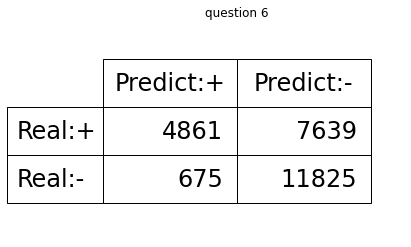

In [18]:
confusionmatrix(tpq6, tnq6, fpq6, fnq6, "question 6")

(The data might be different when running again while exporting)

Accuarcy  is:  0.667440  
Precision  is:  0.878071  
Recall        is:  0.388880  
F-Score    is:  0.539033  

The unbalanced training dataset create a very biased result compared to what we have in question 4: We have a very low recall and high precision. 

Consider (0.1 postrain, 0.5 neg_train) as example, we are predicting more of the testing as negative because the lack of pos_train data would result in lack of pos_train_dictionary. Hence there would be many word get 'laplace smoothed' because it nevered appeared in the dictionary, and those 'smoothed' word might be a 'high-frequency pos word'. So that result lots of the realpositive data predicted as negative. So does the real negative data, more of them are predicted as negative. So that make the precision really high. 

Also, when I started with this question, I leave $\alpha = 10 $ as the questions above, however, that's very bad decision because that make the prediction in positve vey close to zero, which is more biased, and accuracy end around 50%. That's because the vocablist is very large and with smooth constant 10, that make the original n and N_sum part very neglectable. 
 
 $\frac{n+\alpha}{N_{sum}+\alpha |V|} = \frac{1}{|V|}$, when $\alpha |V| >> N_{sum}$ 

$n $ is $n(w_k,y_i)$ and $N_{sum} $ is $\sum_{s=1}^{|V|}n(w_s,y_i)$

So in this case, all pos_train probability factor become really close to the laplace smoothing factor, hence, result in worse accuracy.

#### APPENDIX: utils.py

In [ ]:
from cgi import test
import re
import os
import glob
import random
from nltk.corpus import stopwords
import nltk
import string
from collections import Counter
from pprint import pprint
import math
import numpy as np
import matplotlib.pyplot as plt

from sympy import true

REPLACE_NO_SPACE = re.compile("[._–;:!`¦\'?,\"()\[\]]") # add one '–'
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
nltk.download('stopwords')  

def preprocess_text(text):
	stop_words = set(stopwords.words('english'))
	text = REPLACE_NO_SPACE.sub("", text)
	text = REPLACE_WITH_SPACE.sub(" ", text)
	text = re.sub(r'\d+', '', text)
	text = text.lower()
	text="".join([i for i in text if i not in string.punctuation])
	words = text.split()
	return [w for w in words if w not in stop_words]

def load_training_set(percentage_positives, percentage_negatives):
	vocab = set() # I returned list later
	positive_instances = []
	negative_instances = []
	for filename in glob.glob('train/pos/*.txt'):
		if random.random() > percentage_positives:
			continue
		with open(os.path.join(os.getcwd(), filename), 'r', encoding="utf-8") as f:
			contents = f.read()
			contents = preprocess_text(contents)
			positive_instances.append(contents)
			vocab = vocab.union(set(contents))
	for filename in glob.glob('train/neg/*.txt'):
		if random.random() > percentage_negatives:
			continue
		with open(os.path.join(os.getcwd(), filename), 'r', encoding="utf-8") as f:
			contents = f.read()
			contents = preprocess_text(contents)
			negative_instances.append(contents)
			vocab = vocab.union(set(contents))
	return positive_instances, negative_instances, list(vocab)

def load_test_set(percentage_positives, percentage_negatives):
	positive_instances = []
	negative_instances = []
	for filename in glob.glob('test/pos/*.txt'):
		#print(filename)
		if random.random() > percentage_positives:
			continue
		with open(os.path.join(os.getcwd(), filename), 'r', encoding="utf-8") as f:
			contents = f.read()
			contents = preprocess_text(contents)
			positive_instances.append(contents)
	for filename in glob.glob('test/neg/*.txt'):
		if random.random() > percentage_negatives:
			continue
		with open(os.path.join(os.getcwd(), filename), 'r', encoding="utf-8") as f:
			contents = f.read()
			contents = preprocess_text(contents)
			negative_instances.append(contents)
	return positive_instances, negative_instances

def train(positivedata, negativedata):
    posidict = dict(Counter(sum(positivedata,[])))
    # print(len(sum(positivedata,[])))
    # print(len(sum(negativedata,[])))
    negadict = dict(Counter(sum(negativedata,[])))  
    return posidict, negadict


def probilityof(positivetrain, negativetrain, positivedict, negativedict, vocab, category: string, instance, log: bool, laplacesmooth: bool, smoothconstant = 1):

    posinum = len(positivetrain)
    neganum = len(negativetrain)
    suminstance = neganum+posinum   

    if category == "posi" or category == "positive":
        num = posinum
        trainset = positivetrain
        dictuse = positivedict
    else:
        num = neganum
        trainset = negativetrain
        dictuse = negativedict

    plist = []
    p0 = num/suminstance
    plist.append(p0)
    denominator = sum([len(i) for i in trainset])
    # print(sum(dictuse.values())-denominator)
    vsize = len(vocab)
    # vsize = len(dictuse)

    for i in instance:
        if (not laplacesmooth):
            if i in dictuse:
                probinstance = (dictuse[i]/denominator)
            else: 
                continue
        else: # Smooth
            if i in dictuse:
                probinstance = ((dictuse[i]+smoothconstant)/(denominator+smoothconstant*vsize))
            else: 
                probinstance = ((smoothconstant)/(smoothconstant*vsize))
        plist.append(probinstance)

    if log:
        loglist = list(map(math.log10, plist))
        return sum(loglist)
    
    # if 0 not in plist:
    #     print("prob is not zero")

    return math.prod(plist)

def toCounterDictList(trainingset):
	return [dict(Counter(i)) for i in trainingset]

def accuracy(truePosi, trueNega, falsePosi, falseNega): # Count of all four
	return (truePosi+trueNega)/(truePosi+trueNega+falseNega+falsePosi)

def precision(truePosi, trueNega, falsePosi, falseNega):
	if (truePosi+falsePosi) == 0:
		return 0
	preposi = truePosi/(truePosi+falsePosi)
	prenega = trueNega/(trueNega+falseNega)
	return preposi

def recall(truePosi, trueNega, falsePosi, falseNega):
	if (truePosi+falseNega)== 0:
		return 0
	recposi = truePosi/(truePosi+falseNega)
	recnega = trueNega/(trueNega+falsePosi)
	return recposi

def fscore(truePosi, trueNega, falsePosi, falseNega, beta: 1):
	pre = precision(truePosi, trueNega, falsePosi, falseNega)
	rec = recall(truePosi, trueNega, falsePosi, falseNega)
	if (pre*(beta**2)+rec) == 0:
		return 0
	f = (1+beta**2)*((pre*rec)/(pre*(beta**2)+rec))
	return f

def confusionmatrix(truePosi, trueNega, falsePosi, falseNega, title=""):
	fig = plt.figure()
	plt.title(title)
	col_labels = ['Predict:+', 'Predict:-']
	row_labels = ['Real:+', 'Real:-']
	table_vals = [[truePosi, falseNega], [falsePosi, trueNega]]
	the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 3,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
	the_table.auto_set_font_size(False)
	the_table.set_fontsize(24)
	the_table.scale(4, 4)
	plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
	plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)

	for pos in ['right','top','bottom','left']:
		plt.gca().spines[pos].set_visible(False)

	plt.show()	

	return 


#### APPENDIX: run.py

In [ ]:
from utils import *
from pprint import pprint
import time

def naive_bayes(ptrain:float=0.1,ntrain:float=0.1,ptest:float=0.1,ntest:test=0.1,laplacesmooth:bool=True, logbool:bool=True, smoothconst:float=1):
	
	t0 = time.time()

	percentage_positive_instances_train = ptrain
	percentage_negative_instances_train = ntrain

	percentage_positive_instances_test  = ptest
	percentage_negative_instances_test  = ntest

	print("Loading Data, at time 0.00 sec")

	(pos_train, neg_train, vocab) = load_training_set(percentage_positive_instances_train, percentage_negative_instances_train)
	(pos_test,  neg_test)         = load_test_set(percentage_positive_instances_test, percentage_negative_instances_test)

	# print("Number of positive training instances:", len(pos_train))
	# print("Number of negative training instances:", len(neg_train))
	# print("Number of positive test instances:", len(pos_test))
	# print("Number of negative test instances:", len(neg_test))

	with open('vocab.txt','w') as f: # modified so it don't print a empty line in the last.
		f.write("%s" % vocab[0])
		for word in vocab[1:]:
			f.write("\n%s" % word)
	# print("Vocabulary (training set):", len(vocab))
	
	print("Learning Training Data, at time ", format((time.time()-t0),".2f"), "sec")

	posidict, negadict = train(pos_train, neg_train)
	
	positest = toCounterDictList(pos_test)
	negatest = toCounterDictList(neg_test)

	truePositive = 0
	trueNegative = 0
	falsePositive = 0
	falseNegative = 0

	# i = 0
	print("Testing Positive, at time ", format((time.time()-t0),".2f"), "sec")
	for posiinstance in positest:
		ppositive = probilityof(pos_train,neg_train,posidict,negadict,vocab,'positive',posiinstance,logbool,laplacesmooth,smoothconst)
		pnegative = probilityof(pos_train,neg_train,posidict,negadict,vocab,'negative',posiinstance,logbool,laplacesmooth,smoothconst)
		if ppositive > pnegative:
			truePositive += 1
		else:
			falseNegative += 1

	print("Testing Negative, at time ", format((time.time()-t0),".2f"), "sec")
	for negainstance in negatest:
		ppositive = probilityof(pos_train,neg_train,posidict,negadict,vocab,'positive',negainstance,logbool,laplacesmooth,smoothconst)
		pnegative = probilityof(pos_train,neg_train,posidict,negadict,vocab,'negative',negainstance,logbool,laplacesmooth,smoothconst)
		if ppositive < pnegative:
			trueNegative += 1
		else:
			falsePositive += 1
	
	acc = accuracy(truePositive,trueNegative,falsePositive,falseNegative)
	pre = precision(truePositive,trueNegative,falsePositive,falseNegative)
	rec = recall(truePositive,trueNegative,falsePositive,falseNegative)
	f = fscore(truePositive,trueNegative,falsePositive,falseNegative,1)

	print("Total Time Cost is ", format((time.time()-t0),".2f"), "sec")
	print("Accuarcy  is: ", format(acc,".6f"))
	print("Precision is: ",format(pre,".6f"))
	print("Recall    is: ",format(rec,".6f"))
	print("F-Score   is: ", format(f,".6f"))

	return truePositive,trueNegative,falsePositive,falseNegative

def fixdatabayes(pos_train, neg_train, pos_test, neg_test, vocab, laplacesmooth:bool=True, logbool:bool=True, smoothconst:float=1):

	t0 = time.time()
	
	# print("Learning Training Data, at time 0.00 sec")

	posidict, negadict = train(pos_train, neg_train)
	
	positest = toCounterDictList(pos_test)
	negatest = toCounterDictList(neg_test)

	truePositive = 0
	trueNegative = 0
	falsePositive = 0
	falseNegative = 0

	# i = 0
	# print("Testing Positive, at time ", format((time.time()-t0),".2f"), "sec")
	for posiinstance in positest:
		ppositive = probilityof(pos_train,neg_train,posidict,negadict,vocab,'positive',posiinstance,logbool,laplacesmooth,smoothconst)
		pnegative = probilityof(pos_train,neg_train,posidict,negadict,vocab,'negative',posiinstance,logbool,laplacesmooth,smoothconst)
		if ppositive > pnegative:
			truePositive += 1
		else:
			falseNegative += 1

	# print("Testing Negative, at time ", format((time.time()-t0),".2f"), "sec")
	for negainstance in negatest:
		ppositive = probilityof(pos_train,neg_train,posidict,negadict,vocab,'positive',negainstance,logbool,laplacesmooth,smoothconst)
		pnegative = probilityof(pos_train,neg_train,posidict,negadict,vocab,'negative',negainstance,logbool,laplacesmooth,smoothconst)
		if ppositive < pnegative:
			trueNegative += 1
		else:
			falsePositive += 1
	
	acc = accuracy(truePositive,trueNegative,falsePositive,falseNegative)
	pre = precision(truePositive,trueNegative,falsePositive,falseNegative)
	rec = recall(truePositive,trueNegative,falsePositive,falseNegative)
	f = fscore(truePositive,trueNegative,falsePositive,falseNegative,1)

	# print("Total Time Cost is ", format((time.time()-t0),".2f"), "sec")
	# print("Accuarcy  is: ", format(acc,".6f"))
	# print("Precision is: ",format(pre,".6f"))
	# print("Recall    is: ",format(rec,".6f"))
	# print("F-Score   is: ", format(f,".6f"))

	return truePositive,trueNegative,falsePositive,falseNegative


if __name__=="__main__":
	naive_bayes(0.1,0.1,0.03,0.03)

